In [1]:
import obspy
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.dates as dates
from scipy.signal import correlate
from scipy.stats.stats import pearsonr

In [2]:
from scipy.fft import fft

In [3]:
in_dir = '../../data/banner/infrasound/out/'
# l = os.listdir(in_dir)
l = glob(os.path.join(in_dir, 'c0be4*'))
r = []
for i in l:
    i = os.path.basename(i)
    j = i[5:11]
    if j not in r:
        r.append(j)
r.sort()
dec = [i for i in r if i[2:4] == '12']
jan = [i for i in r if i[2:4] == '01']
pre_snow =[i for i in dec if int(i[-2:]) < 10]
post_snow =[i for i in dec if int(i[-2:]) > 12]
tonga = [i for i in jan if int(i[-2:]) > 14]
tonga = [i for i in tonga if int(i[-2:]) < 18]

  3%|▎         | 1/31 [00:02<01:06,  2.22s/days]

10-20 hz power (Pa2): 19712.03227546085


  6%|▋         | 2/31 [00:04<00:59,  2.06s/days]

10-20 hz power (Pa2): 9893.783114485263


  6%|▋         | 2/31 [00:05<01:17,  2.67s/days]


KeyboardInterrupt: 

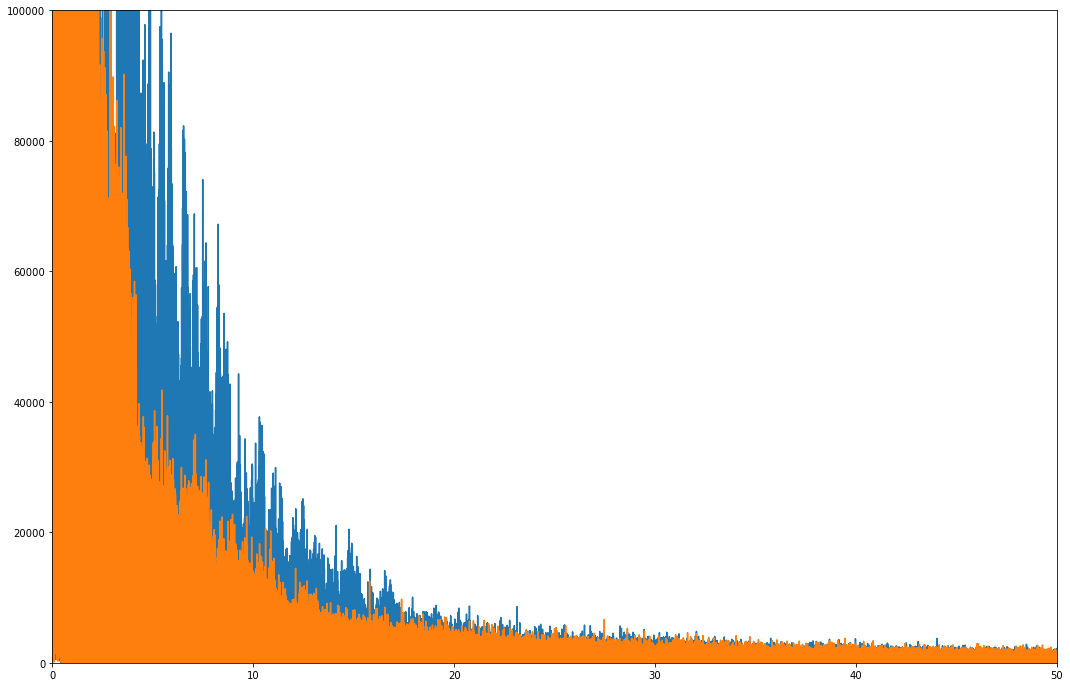

In [4]:
# f, ax = plt.subplots(1,1, figsize = (18,12))

# for d in tqdm(jan, unit = 'days'):
#         st = obspy.Stream()

#         for i, f in enumerate(glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True)):
#             st += obspy.read(os.path.join(f))
#             st.detrend("constant")

#         st = st.merge(method = 1)
#         tr1 = st.select(channel = 'p0')[0]
#         sps = tr1.__dict__['stats']['sampling_rate'] #samples per second
#         ac_calib = 8.2928e-05
#         arr1 = tr1.data * ac_calib
        
#         delta_f = sps/len(arr1)
#         f0 = 10/sps*len(arr1)
#         f1 = 20/sps*len(arr1)
#         fs = np.linspace(0, sps, len(arr1))
#         power = np.abs(fft(arr1))**2
#         plt.plot(fs, power)
#         plt.xlim(0,50)
#         plt.ylim(0,1e5)

#         band_power = np.sum(power[int(f0):int(f1)])*delta_f
#         print(f'10-20 hz power (Pa2): {band_power}')
    

In [5]:
res = pd.DataFrame(index = r, columns = ['10-20hz'])
for d in tqdm(r, unit = 'days'):
#for d in r:
        st = obspy.Stream()

        for i, f in enumerate(glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True)):
            st += obspy.read(os.path.join(f))
            st.detrend("constant")

        st = st.merge(method = 1)
        tr1 = st.select(channel = 'p2')[0]
        sps = tr1.__dict__['stats']['sampling_rate'] #samples per second
        ac_calib = 8.2928e-05
        arr1 = tr1.data * ac_calib
        
        delta_f = sps/len(arr1)
        f0 = 10/sps*len(arr1)
        f1 = 20/sps*len(arr1)
        fs = np.linspace(0, sps, len(arr1))
        power = np.abs(fft(arr1))**2

        band_power = np.nansum(power[int(f0):int(f1)])*delta_f
        #print(f'10-20 hz power (Pa2): {band_power}')
        res.loc[d, '10-20hz'] = band_power
    

 11%|█▏        | 7/61 [00:36<07:20,  8.15s/days]

In [ ]:
res.rolling(3).median()

,10-20hz
211202,NaN
211203,NaN
211204,20440.046408
211205,19492.263252
211206,13418.123651
...,...
220131,8014.221096
220201,8465.494641
220202,8014.221096
220203,7948.199209


<AxesSubplot:>

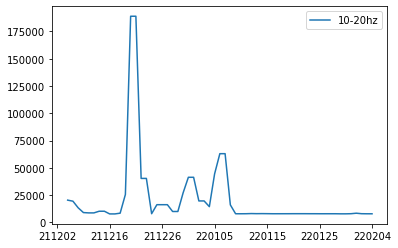

In [ ]:
res.rolling(3).median().plot()